<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Electricity production plants - Visualisation Plots




Data origins from https://opendata.swiss/en/dataset/elektrizitatsproduktionsanlagen and we use the following .csv files.

- ElectricityProductionPlant.csv 
- MainCategoryCatalogue.csv
- SubCategoryCatalogue.csv
- PlantCategoryCatalogue.csv



### Loading data

We use `pd.read_csv` to read the csv files into a `DataFrame`. 

After reading we set the index to the corresponding column which makes it easier to join tables and join the (sub)-category names in order to have all information in one `epp` table 

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 10)

epp = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/ElectricityProductionPlant.csv', parse_dates=['BeginningOfOperation']).set_index('xtf_id')
mainCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/MainCategoryCatalogue.csv').set_index('Catalogue_id')
subCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/SubCategoryCatalogue.csv').set_index('Catalogue_id')
plantCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/PlantCategoryCatalogue.csv').set_index('Catalogue_id')

lang='de'

epp = epp.merge(mainCat[lang].rename("MainCategoryName"),how='left', left_on='MainCategory', right_index=True)
epp = epp.merge(subCat[lang].rename("SubCategoryName"),how='left', left_on='SubCategory', right_index=True)
epp = epp.merge(plantCat[lang].rename("PlantCategoryName"),how='left', left_on='PlantCategory', right_index=True)

display(epp.head())

,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,MainCategoryName,SubCategoryName,PlantCategoryName
xtf_id,,,,,,,,,,,,,,,
5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,maincat_1,subcat_1,plantcat_6,2589880.0,1097661.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5686,Binenweg 5,3904,Naters,VS,1969-09-01,349576.0,349576.0,maincat_1,subcat_1,plantcat_7,2644115.0,1131390.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5726,Robbia 504G,7741,San Carlo,GR,1910-11-03,29150.0,29150.0,maincat_1,subcat_1,plantcat_2,2801863.0,1136379.0,Wasserkraft,Wasserkraft,Ausleitkraftwerk
5727,Via Principale 16,7744,Campocologno,GR,1907-03-01,55000.0,55000.0,maincat_1,subcat_1,plantcat_7,2808646.0,1123676.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5730,Büdemli 65B,7240,Küblis,GR,1922-01-01,44200.0,44200.0,maincat_1,subcat_1,plantcat_7,2778481.0,1198505.0,Wasserkraft,Wasserkraft,Speicherkraftwerk


***
 ## Pie chart

<div class="alert alert-block alert-success">
<b>Exercise: Plot the energy mix in a pie chart a Series</b> 

1. Create a pie chart that displays the relative contribution of the main categories to the total power produced in Switzerland.

2. Create a pie chart that displays the relative contribution of the main categories to the total number of power plants in Switzerland.
    
3. (Optional) Can you plot both figures as subplots in one plot?

4. (Optional) Plot the relative contribution for the sub categories for `maincat_2`.

    
    
</div>

*Hints*
- To prepare the necessary DataFrame you can use the `DataFrame.groupby()` function and sum on the `TotalPower` column: `epp.groupby('MainCategoryName')['TotalPower'].sum()`
- To plot you can use directly the function `Series.plot.pie()` [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html)
- To count instead of sum a grouped value use `.count()`

***


In [58]:
a =  epp.groupby('MainCategoryName')['TotalPower'].sum()
a

MainCategoryName
Fossile Energieträger            284732.00
Kernenergie                     3014600.00
Wasserkraft                    15601722.89
Übrige erneuerbare Energien     3348528.13
Name: TotalPower, dtype: float64

<AxesSubplot:ylabel='TotalPower'>

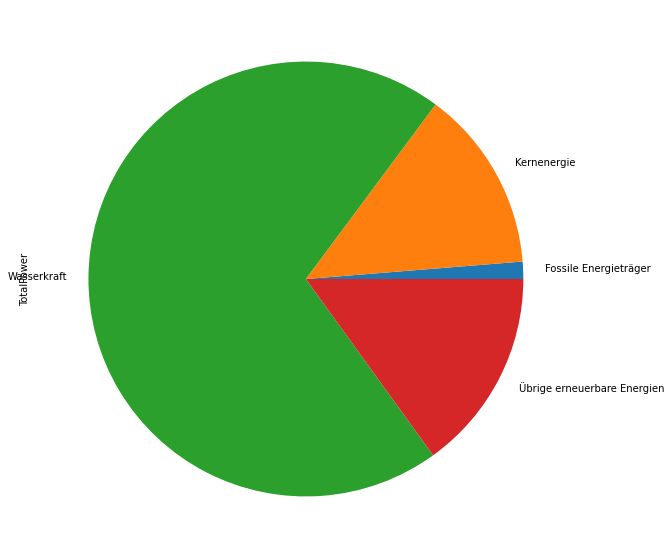

In [41]:
a.plot.pie()

In [42]:
b =  epp.groupby('MainCategoryName')['TotalPower'].count()
b

MainCategoryName
Fossile Energieträger             193
Kernenergie                         4
Wasserkraft                      1453
Übrige erneuerbare Energien    111797
Name: TotalPower, dtype: int64

<AxesSubplot:ylabel='TotalPower'>

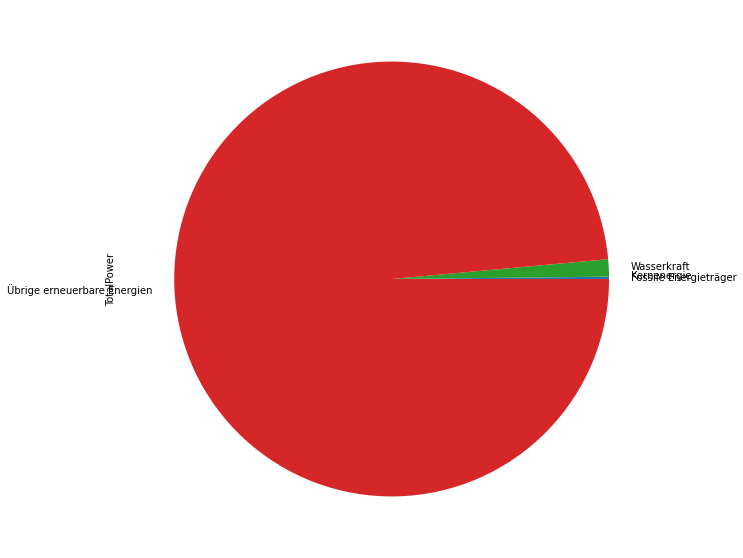

In [43]:
b.plot.pie()

***
 ## Bar chart

<div class="alert alert-block alert-success">
<b>Exercise: Plot the energy data by canton</b> 

1. Use `sns.countplot` to create a bar chart that displays the number of fossil fuel power plants (`epp.MainCategory == 'maincat_4'`) for each canton. Can you also display the different sub-categories?

2. Create a stacked bar chart that displays the contribution to alternative energies (`epp.MainCategory == 'maincat_2'`) for each canton.
    
3. (Optional) Can you create a similar bar chart with seaborn, i.e. `sns.barplot()`? P
    
4. (Optional) Play around with the different `seaborn` themes `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.
    
    
</div>

*Hints*
- With `sns.countplot` you can provide your entier dataset 
- To prepare the necessary DataFrame you can use the `DataFrame.groupby()` function and sum on the `TotalPower` column: `epp.groupby(['Canton', 'SubCategoryName'], as_index=False)['TotalPower'].sum()`. Furthermore, you can use `DataFrame.pivot_table()` to explode the sub categories into columns. 


***


<AxesSubplot:xlabel='Canton', ylabel='count'>

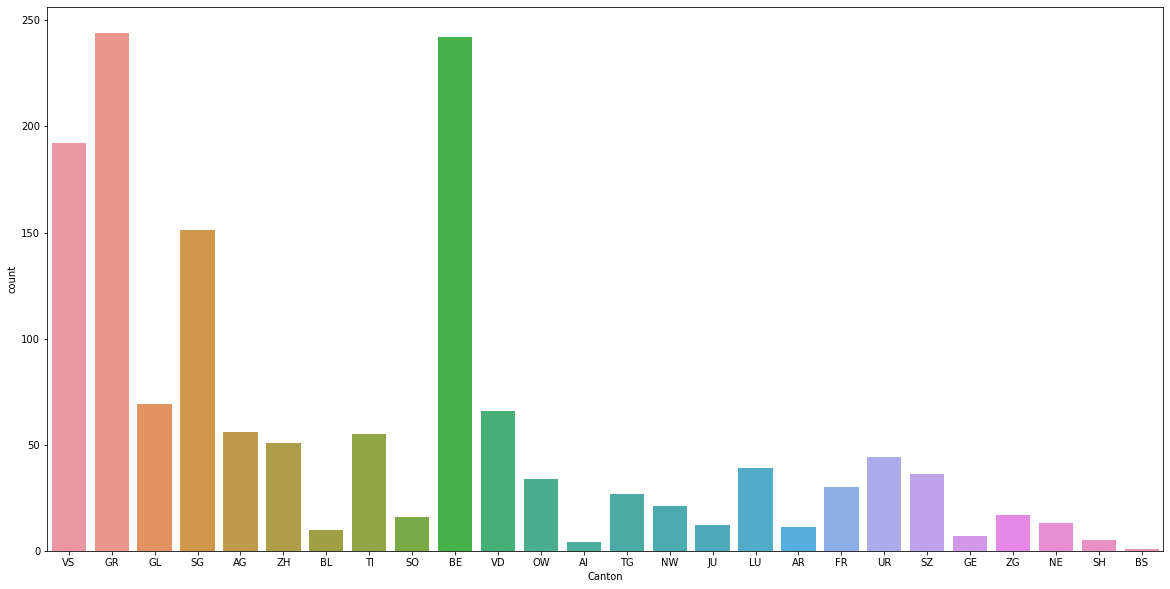

In [60]:
sns.countplot(data = epp[epp.MainCategory == 'maincat_1'], x = 'Canton')

In [61]:
alternatives = epp[epp.MainCategory == 'maincat_2']
alternatives = alternatives.groupby(['Canton', 'SubCategoryName'], as_index=False)['TotalPower'].sum()
alternatives

,Canton,SubCategoryName,TotalPower
0,AG,Abfälle,32510.00
1,AG,Biomasse,17980.70
2,AG,Photovoltaik,190564.80
3,AG,Windenergie,10.00
4,AI,Biomasse,110.00
...,...,...,...
77,ZG,Photovoltaik,39670.53
78,ZH,Abfälle,67912.00
79,ZH,Biomasse,36651.50
80,ZH,Photovoltaik,241818.58


In [63]:
perCanton = alternatives.pivot_table(index='Canton', columns = ['SubCategoryName'])
perCanton = perCanton.replace(np.nan, 0)
perCanton

TotalPower                                   
SubCategoryName   Abfälle  Biomasse  Photovoltaik Windenergie
Canton                                                       
AG                 32510.0   17980.7    190564.80        10.0
AI                     0.0     110.0     10563.30         0.0
AR                     0.0    1837.0     20072.45         0.0
BE                 36120.0   43540.9    344561.95     37250.0
BL                     0.0    1495.0     82969.14         0.0
BS                  8107.3   13215.4     26509.43         0.0
FR                 10000.0    7166.3    162000.39         0.0
GE                 18400.0     611.0     64842.62         0.0
GL                 12500.0     615.0      8466.31         0.0
GR                 13000.0   22923.0     76801.06      3010.0
JU                     0.0    4756.0     48354.57     11013.5
LU                 30236.0    9770.9    206856.84      4242.0
NE                 14145.0    1456.1     56290.07         0.0
NW                     0.0    1330.0      9942.57         0.0
OW                     0.0     800.0     16579.81         0.0
SG                 42850.0    8435.0    224785.53       210.0
SH                     0.0    1598.0     27072.92       250.0
SO                 21600.0    2211.0    109583.91       162.8
SZ                     0.0   11183.0     44184.32        20.0
TG                 15640.0   13533.0    152774.28         6.4
TI                 18600.0    1954.0    101841.66     12750.0
UR                     0.0     130.0      6194.03      3300.0
VD                 21240.0   13113.9    255883.20         0.0
VS                 29020.0    1579.0    119282.46     16360.0
ZG                     0.0    1540.0     39670.53         0.0
ZH                 67912.0   36651.5    241818.58        60.7

<AxesSubplot:xlabel='Canton'>

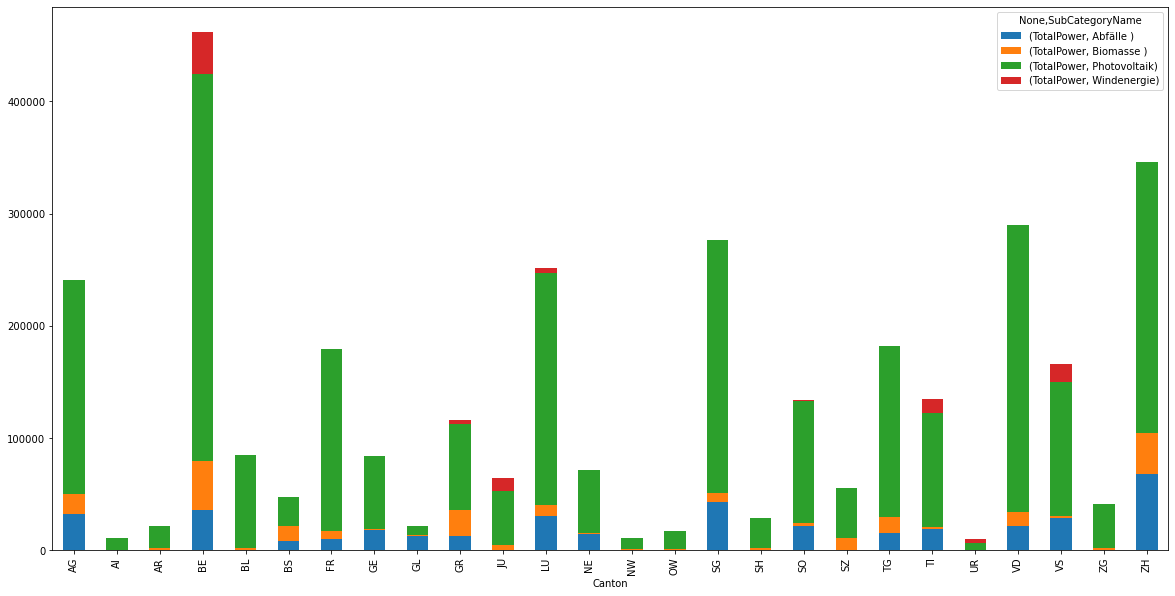

In [64]:
perCanton.plot.bar(stacked=True)

***
 ## History Plots

<div class="alert alert-block alert-success">
<b>Exercise: Plot the energy mix over time</b> 

**Step 1**: Create a line plot over the time that cumulates the energy that is produced until then.

**Step 2**: Create a line plot with multiple lines. Each line represents the cumulative sum of the energy produced by one main category 

**Step 3**: Create an area plot with the same data as in step 2. With the area plot you can show the individual as well as the total values.
    
</div>

*Hints*
- **Step 1**:
    - With `df = epp.groupby('BeginningOfOperation')['TotalPower' ].sum().sort_index()` you can create a `DataFrame` with the added `TotalPower` for each `BeginningOfOperations` date
    - use the `df.cumsum` function to return the cumulative sum that you can then plot directly with pandas into a `df.plot.line` plot.

- **Step 2**:
    - Do the `groupby` not only by `BeginningOfOperation` but by `['BeginningOfOperation', 'MainCategoryName']`. Use  `as_index=False` to have a `DataFrame` as a result of the grouping and not a `Series`
    - use `DataFrame.pivot_table()` to explode the main categories into columns.
    - use `data.replace(np.nan, 0)` to replace missing values with 0
***


In [65]:
df = epp.groupby('BeginningOfOperation')['TotalPower' ].sum().sort_index()
df

BeginningOfOperation
1863-01-01     200.00
1886-01-01     740.00
1888-01-01     360.00
1890-01-01     240.00
1891-01-01    5315.00
               ...   
2021-03-26     228.14
2021-03-28      29.70
2021-03-30     171.80
2021-04-08       7.03
2021-04-14     104.72
Name: TotalPower, Length: 5935, dtype: float64

In [66]:
df = df.cumsum()
df

BeginningOfOperation
1863-01-01         200.00
1886-01-01         940.00
1888-01-01        1300.00
1890-01-01        1540.00
1891-01-01        6855.00
                 ...     
2021-03-26    22249269.77
2021-03-28    22249299.47
2021-03-30    22249471.27
2021-04-08    22249478.30
2021-04-14    22249583.02
Name: TotalPower, Length: 5935, dtype: float64

<AxesSubplot:xlabel='BeginningOfOperation'>

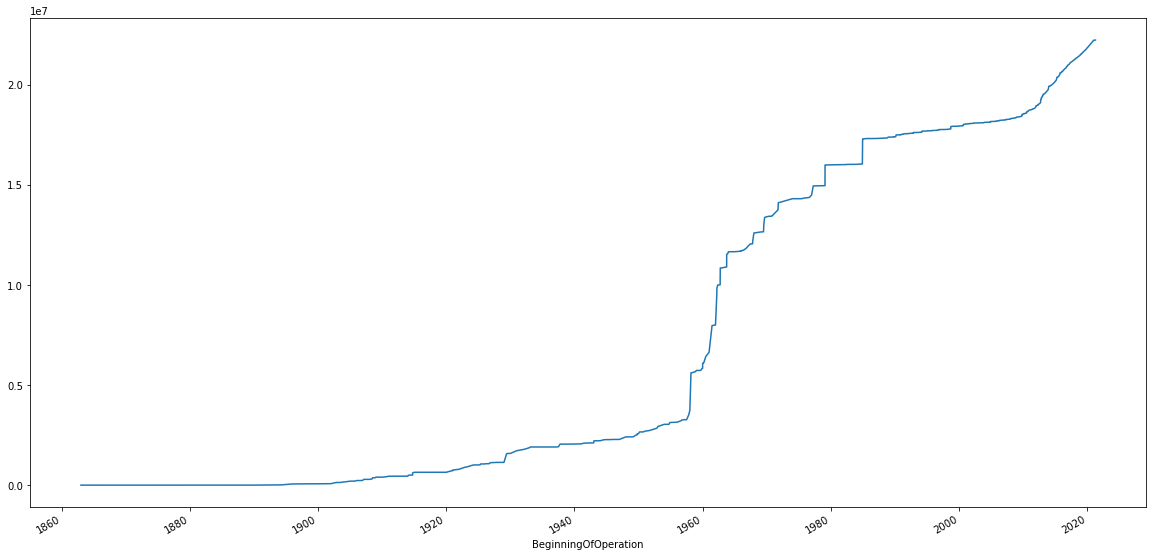

In [67]:
df.plot.line()

In [69]:
df = epp.groupby(['BeginningOfOperation', 'MainCategoryName'], as_index=False)['TotalPower' ].sum().sort_index()
df = df.pivot_table(index='BeginningOfOperation', columns = ['MainCategoryName']).replace(np.nan, 0)
df = df.cumsum() 
df

TotalPower                           \
MainCategoryName     Fossile Energieträger Kernenergie  Wasserkraft   
BeginningOfOperation                                                  
1863-01-01                             0.0         0.0       200.00   
1886-01-01                             0.0         0.0       940.00   
1888-01-01                             0.0         0.0      1300.00   
1890-01-01                             0.0         0.0      1540.00   
1891-01-01                             0.0         0.0      6855.00   
...                                    ...         ...          ...   
2021-03-26                        284732.0   3014600.0  15601722.89   
2021-03-28                        284732.0   3014600.0  15601722.89   
2021-03-30                        284732.0   3014600.0  15601722.89   
2021-04-08                        284732.0   3014600.0  15601722.89   
2021-04-14                        284732.0   3014600.0  15601722.89   

                                                  
MainCategoryName     Übrige erneuerbare Energien  
BeginningOfOperation                              
1863-01-01                                  0.00  
1886-01-01                                  0.00  
1888-01-01                                  0.00  
1890-01-01                                  0.00  
1891-01-01                                  0.00  
...                                          ...  
2021-03-26                            3348214.88  
2021-03-28                            3348244.58  
2021-03-30                            3348416.38  
2021-04-08                            3348423.41  
2021-04-14                            3348528.13  

[5935 rows x 4 columns]

<AxesSubplot:xlabel='BeginningOfOperation'>

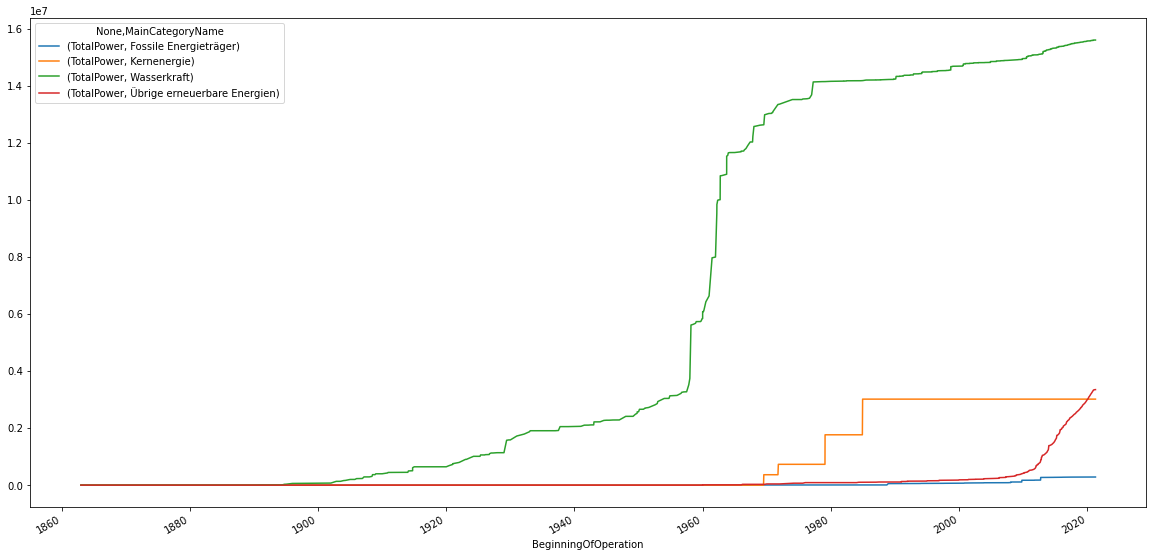

In [70]:
df.plot.line()

<AxesSubplot:xlabel='BeginningOfOperation'>

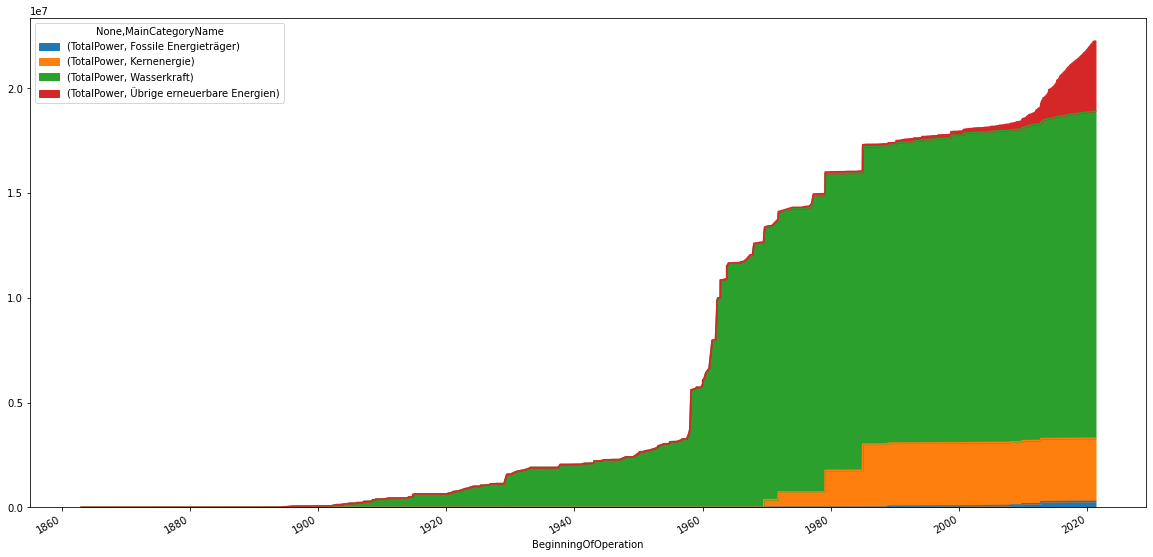

In [71]:
df.plot.area()